<a href="https://colab.research.google.com/github/spockthompson/Project-2-Machine-Learning/blob/main/Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 Part 2
## Stroke Prediction Dataset
 - https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
 - This data set uses key features to predict the probability that an individual person with specific characteristics is at risk of stroke.

- Solution by: Scotty Thomason

In [1]:
# Import Nessesary Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn import set_config
set_config(display='diagram')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#Making a copy of the original data
df_ml = df.copy()

In [4]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#drop unneeded column
df_ml = df_ml.drop(columns = 'id')

#check class balance
df_ml['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [6]:
#check duplicates
df_ml.duplicated().sum()

0

In [7]:
#drop duplicates
df_ml = df_ml.drop_duplicates()
df_ml.duplicated().sum()

0

In [8]:
#quick check for outliers
df_ml.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
# Check for missing values
print('Missing data:\n', df.isna().sum())

Missing data:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [10]:
# Check categories

for col in df.select_dtypes('object'):
  print(df[col].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [11]:
#Filling in missing values with "mean"
df_ml.fillna(df.mean())

<ipython-input-11-b81c3a5a9e35>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_ml.fillna(df.mean())


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## Visualization 

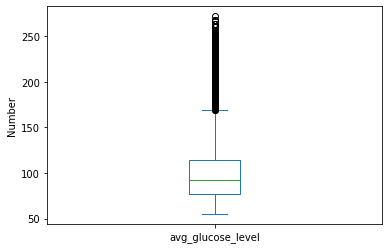

In [12]:
df['avg_glucose_level'].plot(kind='box')
plt.ylabel('Number');
plt.show()

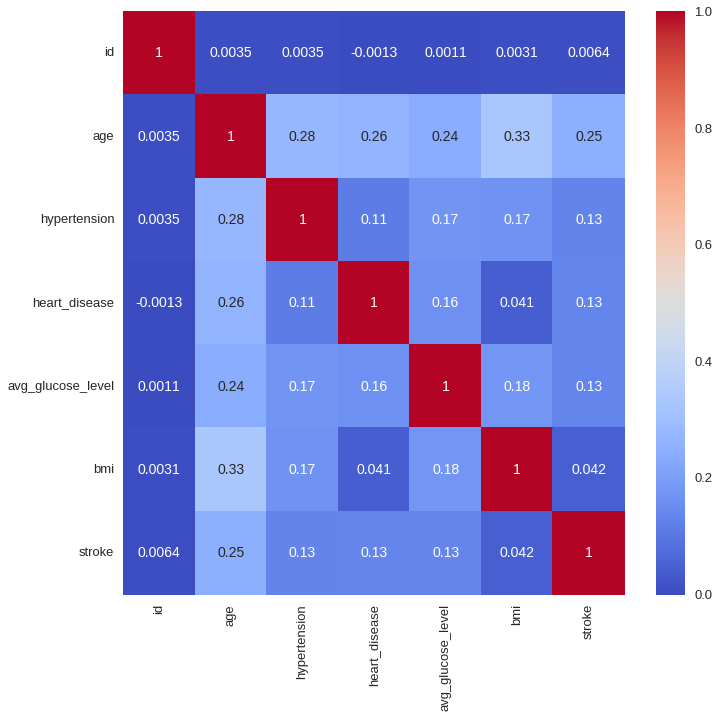

In [75]:
correlation = df_ml['avg_glucose_level'].corr(df_ml['stroke'])
correlation

corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Creating a multivariate exploratory visualization

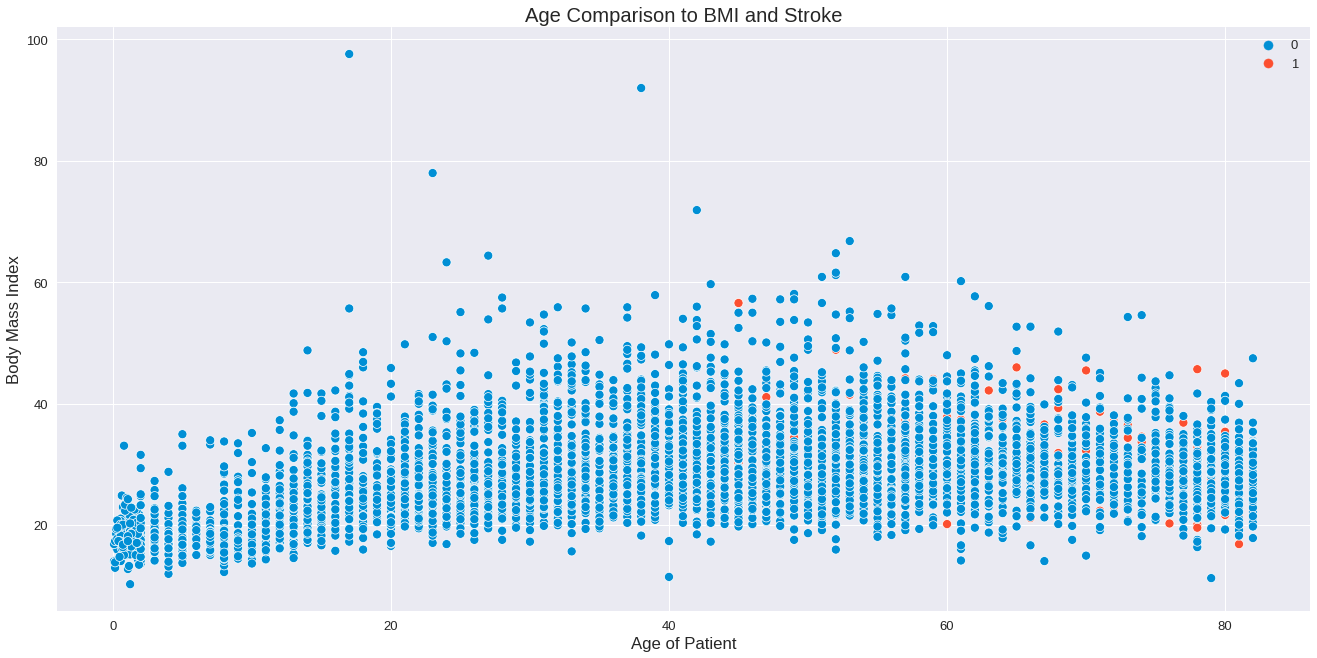

In [73]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = df_ml, x = 'age', y = 'bmi', hue = 'stroke')\

plt.legend();
plt.style.use('seaborn-darkgrid')
plt.title('Age Comparison to BMI and Stroke')
plt.xlabel('Age of Patient')
plt.ylabel('Body Mass Index');
# bmi = Body Mass Index

- The scatter plot above shows us a lot of data points but what really stands out from all the points is the orange dots on the far right. Looking at these it seems that there is a possible correlation between the age over 40 and the occurence of a stroke in disregurades to ones body mass index.

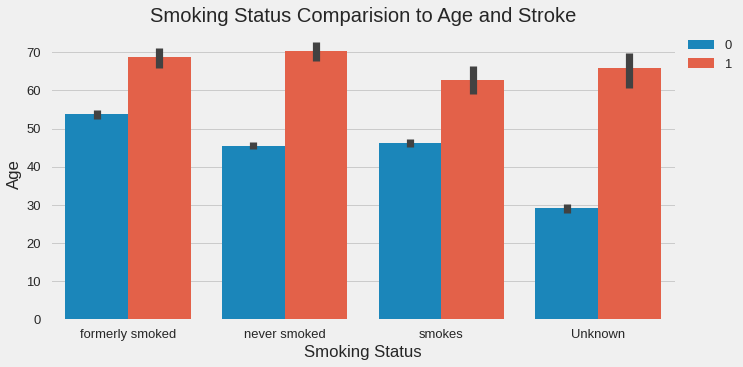

In [87]:
plt.figure(figsize=(10,5))
sns.barplot(data = df_ml, x = 'smoking_status', y = 'age', hue = 'stroke')
plt.style.use('fivethirtyeight')
plt.title('Smoking Status Comparision to Age and Stroke')
plt.xlabel('Smoking Status')
plt.ylabel('Age');
plt.legend(bbox_to_anchor=(1,1));

- The barplot aboves shows us the comparison of and individuals smoking status, age, and the occurence of a stroke. We can see judging by this that smoking does not effect your probability perhaps. we can also see under the "Never Smoked" bar that age was the deciding factor on the occurence of a stroke. 

- Conclusion:
 - Judging by these two graphs we could say that there is a likley connection between an individuals age and the probability of stroke regardless of smoking or body mass index.